# Pandas
- Solve short hands-on challenges to perfect your data manipulation skills.
- https://www.kaggle.com/learn/pandas

## 3.- Exercise: Summary Functions and Maps
- Now you are ready to get a deeper understanding of your data.

In [2]:
import numpy as np
import pandas as pd

print('np.__version__:', np.__version__)
print('pd.__version__:', pd.__version__)

#pd.set_option('display.max_rows', 5)

np.__version__: 1.23.5
pd.__version__: 1.5.3


In [3]:
reviews = pd.read_csv('Red.csv')
reviews.head(3)

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year
0,Pomerol 2011,France,Pomerol,Château La Providence,4.2,100,95.00,2011
1,Lirac 2017,France,Lirac,Château Mont-Redon,4.3,100,15.50,2017
2,Erta e China Rosso di Toscana 2015,Italy,Toscana,Renzo Masi,3.9,100,7.45,2015


In [4]:
# 1. median of Rating column in the reviews DataFrame?
print(reviews.Rating.median(), type(reviews.Rating.median()))
print(reviews.Rating.mean(), type(reviews.Rating.mean()))
print(reviews.Rating.mode(), type(reviews.Rating.mode()))
print(reviews.Rating.mode().iloc[0], type(reviews.Rating.mode().iloc[0]))
print(reviews.Rating.quantile(0.5), type(reviews.Rating.quantile(0.5))) # median
print(reviews.Rating.quantile([0.25, 0.75]), type(reviews.Rating.quantile([0.25, 0.75])))  

3.9 <class 'numpy.float64'>
3.8903415647357487 <class 'numpy.float64'>
0    3.8
Name: Rating, dtype: float64 <class 'pandas.core.series.Series'>
3.8 <class 'numpy.float64'>
3.9 <class 'numpy.float64'>
0.25    3.7
0.75    4.1
Name: Rating, dtype: float64 <class 'pandas.core.series.Series'>


In [5]:
# 2. What countries are represented in the dataset? (Your answer should not include any duplicates.)
reviews.Country.unique()

array(['France', 'Italy', 'Austria', 'New Zealand', 'Chile', 'Australia',
       'South Africa', 'Spain', 'United States', 'Portugal', 'Hungary',
       'Brazil', 'Argentina', 'Romania', 'Germany', 'Greece', 'Mexico',
       'Moldova', 'Switzerland', 'Slovenia', 'Israel', 'Georgia',
       'Lebanon', 'Uruguay', 'Turkey', 'Croatia', 'China', 'Slovakia',
       'Bulgaria', 'Canada'], dtype=object)

In [6]:
# 3. How often does each country appear in the dataset? Create a Series
# reviews_per_country mapping countries to the count of reviews of wines from
# that country.
reviews.Country.value_counts()

Italy            2650
France           2256
Spain            1142
South Africa      500
United States     374
Chile             326
Germany           248
Australia         246
Argentina         246
Portugal          230
Austria           220
New Zealand        63
Brazil             40
Romania            23
Lebanon            15
Israel             13
Greece             13
Switzerland        12
Hungary             9
Moldova             8
Slovenia            8
Turkey              6
Georgia             5
Uruguay             4
Croatia             2
Bulgaria            2
Canada              2
Mexico              1
China               1
Slovakia            1
Name: Country, dtype: int64

In [7]:
# 4. Create variable centered_price containing a version of the price column
# with the mean price subtracted.
# (Note: this 'centering' transformation is a common preprocessing step before
# applying various machine learning algorithms.)
print(reviews.Price.mean(), reviews.Price.min(), reviews.Price.max() )
centered_price = reviews.Price - reviews.Price.mean()
centered_price


39.14506462035541 3.55 3410.79


0       55.854935
1      -23.645065
2      -31.695065
3      -30.425065
4       -9.995065
          ...    
8661   -22.675065
8662   -19.055065
8663   -15.195065
8664   -32.935065
8665   -31.265065
Name: Price, Length: 8666, dtype: float64

In [8]:
# with map() and with apply() for the future.

In [9]:
## 5. I'm an economical wine buyer. Which wine is the "best bargain"? Create a
# variable bargain_wine with the title of the wine with the highest
# points-to-price ratio in the dataset.
ratio = reviews.Rating / reviews.Price
best = max(ratio)
print(best, type(best), ' - ratio:', type(ratio))
display(reviews.loc[ratio == best])
print(type(reviews.loc[ratio == best]))
print(reviews.loc[ratio == best].loc[6408, 'Name'])
print(reviews.loc[ratio == best, 'Name'])
print(reviews.loc[ratio == best].loc[-1:, 'Name'])
## here the solution is HOW obtain de index of the row.. 
ix = reviews.loc[ratio == best].index.item()
ix
print(reviews.loc[ratio == best].loc[ix, 'Name'])
reviews.loc[ratio == best, 'Name'].item()


1.0026385224274406 <class 'float'>  - ratio: <class 'pandas.core.series.Series'>


,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year
6408,Nero d'Avola 2018,Italy,Terre Siciliane,Monte Pietroso,3.8,56,3.79,2018


<class 'pandas.core.frame.DataFrame'>
Nero d'Avola 2018
6408    Nero d'Avola 2018
Name: Name, dtype: object
6408    Nero d'Avola 2018
Name: Name, dtype: object
Nero d'Avola 2018


"Nero d'Avola 2018"

In [10]:
# with idxmax i direct
berg1_idx = (reviews.Rating / reviews.Price).idxmax()
berg1_idx
barg1_w1 = reviews.loc[berg1_idx, 'Name']
barg1_w1

"Nero d'Avola 2018"

In [11]:
# 6. There are only so many words you can use when describing a bottle of wine.
# Is a wine more likely to be "tropical" or "fruity"? Create a Series
# descriptor_counts counting how many times each of these two words appears in
# the description column in the dataset. (For simplicity, let's ignore the
# capitalized versions of these words.)

In [12]:
## Regions Tunuyan Toscana
reviews.Region.unique()
reviews.Region.value_counts()
reviews.loc[reviews.Region == 'Toscana'].count()
reviews.loc[reviews.Region == 'Tunuyán'].count()
reviews.loc[reviews.Region == 'San Carlos'].count()
reviews.loc[(reviews.Region == 'Tunuyán') |
            (reviews.Region == 'San Carlos')].count()


Name               8
Country            8
Region             8
Winery             8
Rating             8
NumberOfRatings    8
Price              8
Year               8
dtype: int64

In [13]:
n_ty = reviews.Region.map(lambda r: 'Tunuyán' in r).sum()
#n_ty = reviews.loc[reviews.Region == 'Tunuyán'].count()
n_sc = reviews.Region.map(lambda r: 'San Carlos' in r).sum()
reg_cnt = pd.Series([n_ty, n_sc], index=['ty', 'sc'])
reg_cnt

ty    7
sc    1
dtype: int64

In [17]:
## 7. num of starts instead of Rating

def stars(row):
    if row.Country == 'Canada':
        return 3
    elif row.Rating >= 3.9:
        return 3
    elif row.Rating >= 3.2:
        return 2
    else:
        return 1

star_ratings = reviews.apply(stars, axis='columns')
star_ratings

0       3
1       3
2       3
3       2
4       3
       ..
8661    2
8662    3
8663    2
8664    2
8665    2
Length: 8666, dtype: int64

## JM_#1: mean, median, mode, percentile - Meaning and GRAPHS.

In [76]:
#reviews.groupby('Country').Name.count().sort_values()

In [162]:
# let's take prices but only from...
#df = reviews.loc[(reviews.Country != 'Uruguay')]
df = reviews.loc[(reviews.Price <= 10)]
print(df.shape, df.columns)

(1994, 8) Index(['Name', 'Country', 'Region', 'Winery', 'Rating', 'NumberOfRatings',
       'Price', 'Year'],
      dtype='object')


In [163]:
S1 = df.Price.value_counts()
S2 = df.groupby('Price').Price.count()
S2

Price
3.55      1
3.70      1
3.79      1
3.95      1
3.99      2
         ..
9.94      1
9.95     41
9.98      2
9.99     26
10.00    11
Name: Price, Length: 356, dtype: int64

In [164]:
pmean = S1.mean()
pmedian = S1.median()
pmode = S1.mode()[0]

pmean, pmedian, pmode,

(5.601123595505618, 2.0, 1)

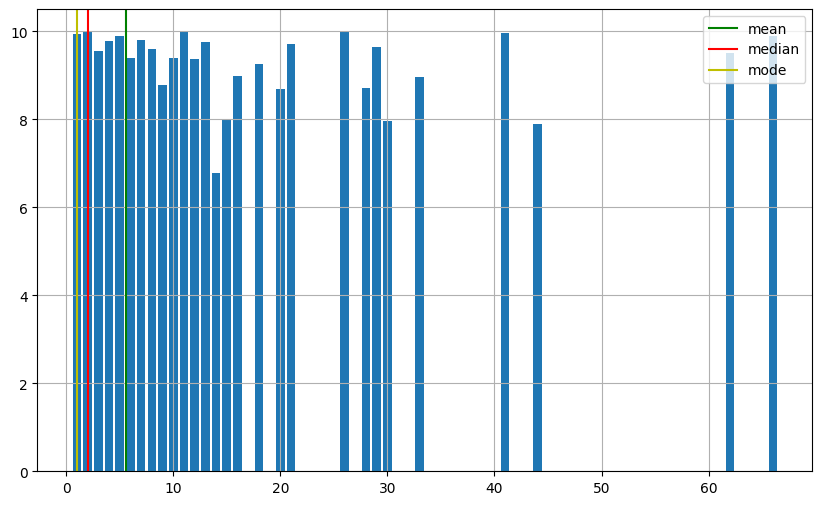

In [165]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(10,6))
ax1.bar(S1, S1.index)
ax1.axvline(x=pmean, color='g', label='mean')
ax1.axvline(x=pmedian, color='r', label='median')
ax1.axvline(x=pmode, color='y', label='mode')
ax1.legend()
ax1.grid()
plt.show()

## JM_#2: compare wines of two or more Countries or Regions in Rating and Price.